# Dashboard Video 

https://youtu.be/0RU8qprEX0A

1- Importing Libraries.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis

2- Reading CSV File.

In [10]:
worldometer_data = pd.read_csv(r'E:\DEPI AI COURSE\Lectures\Technical\Assignments\Assignment 3\CSV Files\worldometer_data.csv')
df1=pd.DataFrame(worldometer_data)


5- Viewing DataFrame Description.

In [11]:
df1.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


4- Calculating Number Of Null Values In Each Column And Number Of Duplicated Rows.

In [12]:
missing_values = df1.isnull().sum()
print("Missing values per column:\n", missing_values)

print("-------------------------------------------------------")

duplicates = df1.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

Missing values per column:
 Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64
-------------------------------------------------------
Number of duplicated rows: 0


5- Data Cleaning.

In [13]:
df1=df1.drop('NewCases',axis=1)
df1=df1.drop('NewDeaths',axis=1)
df1=df1.drop('NewRecovered',axis=1)
df1=df1.drop('WHO Region',axis=1)

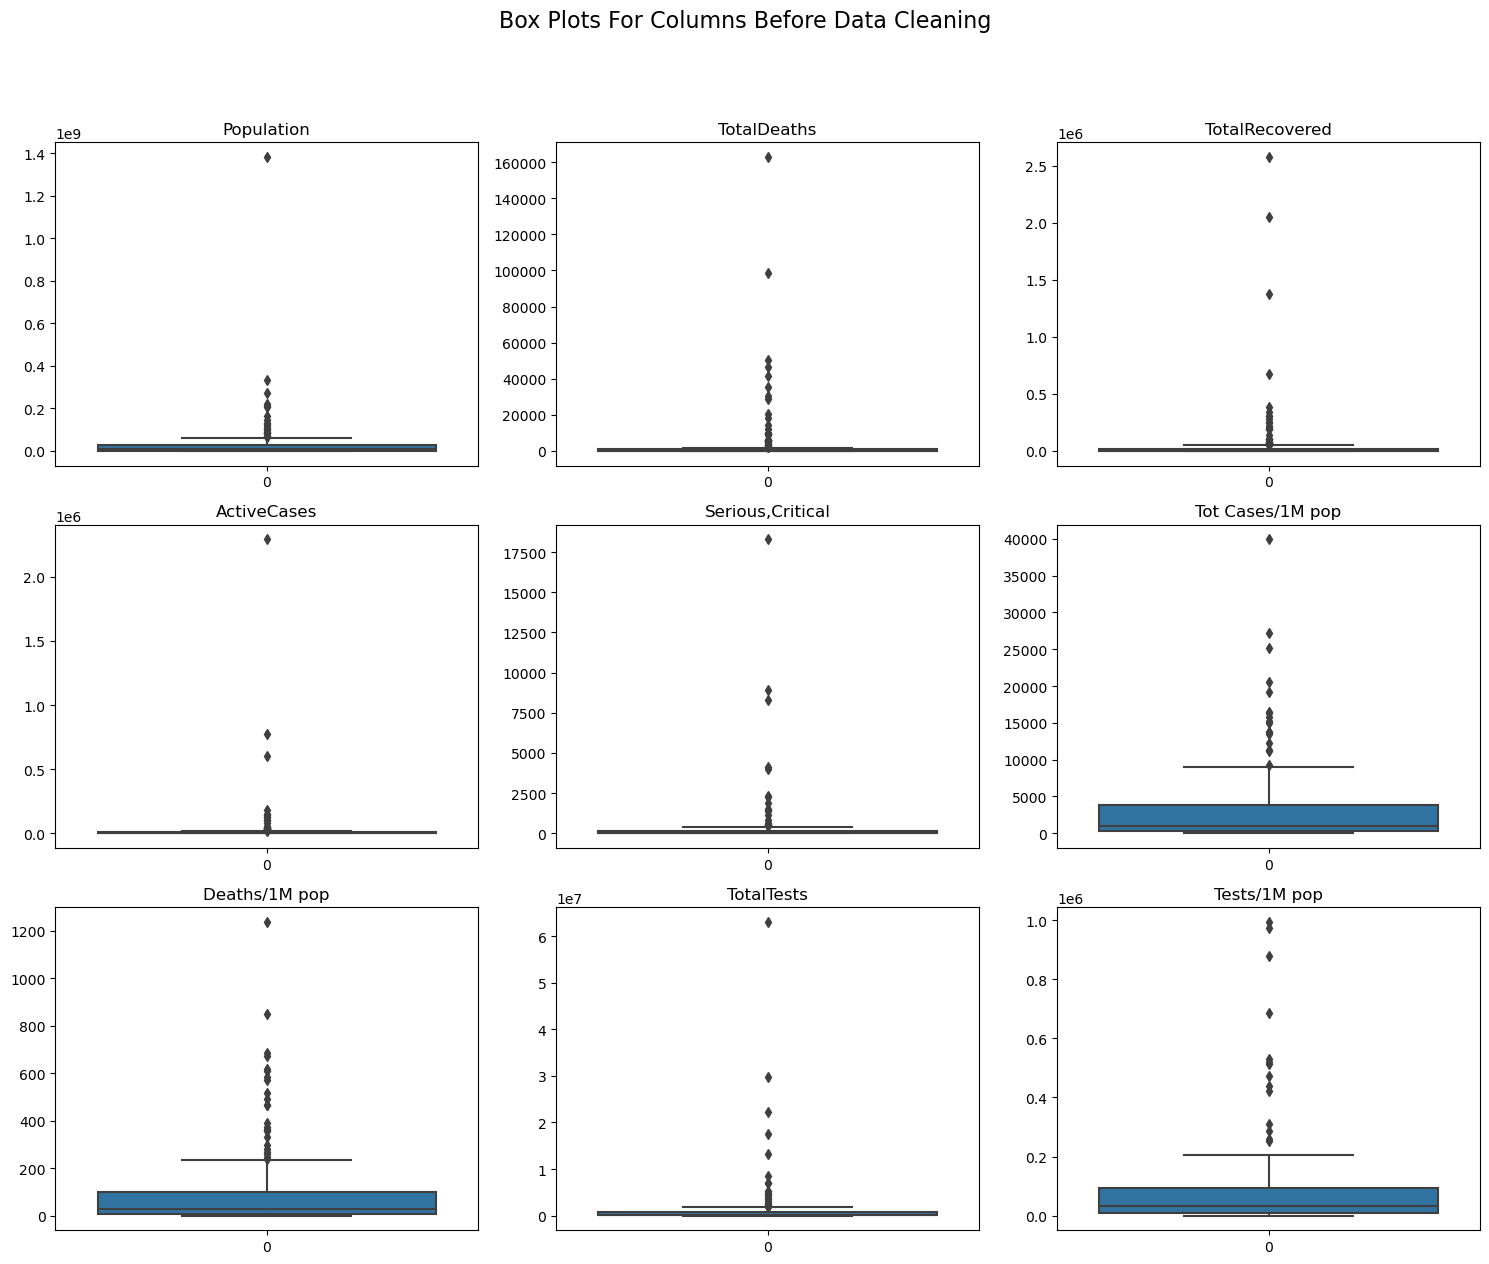

In [14]:
columns = [ 'Population', 'TotalDeaths', 'TotalRecovered', 
                   'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  
axes = axes.flatten()  

for i, col in enumerate(columns):
    sns.boxplot(data=df1[col], ax=axes[i]) 
    axes[i].set_title(col)
fig.suptitle('Box Plots For Columns Before Data Cleaning', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()

In [15]:
df1['Continent'] = df1['Continent'].fillna(df1['Continent'].mode()[0])

In [16]:
for i in range(2):
    Q1 = df1['Population'].quantile(0.25)
    Q3 = df1['Population'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    while True:
        outliers = (df1['Population'] < lower_bound) | (df1['Population'] > upper_bound)
        if not outliers.any():  
            break
        
        df1.loc[outliers, 'Population'] = df1.loc[~outliers, 'Population'].mean()
        Q1 = df1['Population'].quantile(0.25)
        Q3 = df1['Population'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    print(f'Number of outliers: {outliers.sum()}')

    df1['Population'] = df1['Population'].fillna(df1['Population'].mean())

Number of outliers: 0
Number of outliers: 0


In [17]:
df1['TotalDeaths'] = df1['TotalDeaths'].fillna(df1['TotalDeaths'].mean())

In [18]:
Q1 = df1['TotalRecovered'].quantile(0.25)
Q3 = df1['TotalRecovered'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

while True:
    outliers = (df1['TotalRecovered'] < lower_bound) | (df1['TotalRecovered'] > upper_bound)
    if not outliers.any():
        break  
    
    df1.loc[outliers, 'TotalRecovered'] = df1.loc[~outliers, 'TotalRecovered'].mean()
    Q1 = df1['TotalRecovered'].quantile(0.25)
    Q3 = df1['TotalRecovered'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
print(f'Number of outliers: {outliers.sum()}')

df1['TotalRecovered'] = df1['TotalRecovered'].fillna(df1['TotalRecovered'].mean())

Number of outliers: 0


In [19]:
Q1 = df1['ActiveCases'].quantile(0.25)
Q3 = df1['ActiveCases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

while True:
    outliers = (df1['ActiveCases'] < lower_bound) | (df1['ActiveCases'] > upper_bound) 
    if not outliers.any():
        break  
    
    df1.loc[outliers, 'ActiveCases'] = df1.loc[~outliers, 'ActiveCases'].mean()
    Q1 = df1['ActiveCases'].quantile(0.25)
    Q3 = df1['ActiveCases'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
print(f'Number of outliers: {outliers.sum()}')

df1['ActiveCases'] = df1['ActiveCases'].fillna(df1['ActiveCases'].mean())

Number of outliers: 0


In [20]:
for i in range(2):
    Q1 = df1['Serious,Critical'].quantile(0.25)
    Q3 = df1['Serious,Critical'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    while True:
        outliers = (df1['Serious,Critical'] < lower_bound) | (df1['Serious,Critical'] > upper_bound) 
        if not outliers.any():
            break  
        
        df1.loc[outliers, 'Serious,Critical'] = df1.loc[~outliers, 'Serious,Critical'].mean()
        Q1 = df1['Serious,Critical'].quantile(0.25)
        Q3 = df1['Serious,Critical'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    print(f'Number of outliers: {outliers.sum()}')

    df1['Serious,Critical'] = df1['Serious,Critical'].fillna(df1['Serious,Critical'].mean())

Number of outliers: 0
Number of outliers: 0


In [21]:
Q1 = df1['Tot Cases/1M pop'].quantile(0.25)
Q3 = df1['Tot Cases/1M pop'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

while True:
    outliers = (df1['Tot Cases/1M pop'] < lower_bound) | (df1['Tot Cases/1M pop'] > upper_bound) 
    if not outliers.any():
        break  
    
    df1.loc[outliers, 'Tot Cases/1M pop'] = df1.loc[~outliers, 'Tot Cases/1M pop'].mean()
    Q1 = df1['Tot Cases/1M pop'].quantile(0.25)
    Q3 = df1['Tot Cases/1M pop'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
print(f'Number of outliers: {outliers.sum()}')

df1['Tot Cases/1M pop'] = df1['Tot Cases/1M pop'].fillna(df1['Tot Cases/1M pop'].mean())

Number of outliers: 0


In [22]:
for i in range(2):
    Q1 = df1['Deaths/1M pop'].quantile(0.25)
    Q3 = df1['Deaths/1M pop'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    while True:
        outliers = (df1['Deaths/1M pop'] < lower_bound) | (df1['Deaths/1M pop'] > upper_bound) 
        if not outliers.any():
            break  
        
        df1.loc[outliers, 'Deaths/1M pop'] = df1.loc[~outliers, 'Deaths/1M pop'].mean()
        Q1 = df1['Deaths/1M pop'].quantile(0.25)
        Q3 = df1['Deaths/1M pop'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    print(f'Number of outliers: {outliers.sum()}')

    df1['Deaths/1M pop'] = df1['Deaths/1M pop'].fillna(df1['Deaths/1M pop'].mean())

Number of outliers: 0
Number of outliers: 0


In [23]:
for i in range(2):
    Q1 = df1['TotalTests'].quantile(0.25)
    Q3 = df1['TotalTests'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    while True:
        outliers = (df1['TotalTests'] < lower_bound) | (df1['TotalTests'] > upper_bound) 
        if not outliers.any():
            break  
        
        df1.loc[outliers, 'TotalTests'] = df1.loc[~outliers, 'TotalTests'].mean()
        Q1 = df1['TotalTests'].quantile(0.25)
        Q3 = df1['TotalTests'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    print(f'Number of outliers: {outliers.sum()}')

    df1['TotalTests'] = df1['TotalTests'].fillna(df1['TotalTests'].mean())

Number of outliers: 0
Number of outliers: 0


In [24]:
for i in range(2):
    Q1 = df1['Tests/1M pop'].quantile(0.25)
    Q3 = df1['Tests/1M pop'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    while True:
        outliers = (df1['Tests/1M pop'] < lower_bound) | (df1['Tests/1M pop'] > upper_bound) 
        if not outliers.any():
            break  
        
        df1.loc[outliers, 'Tests/1M pop'] = df1.loc[~outliers, 'Tests/1M pop'].mean()
        Q1 = df1['Tests/1M pop'].quantile(0.25)
        Q3 = df1['Tests/1M pop'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    print(f'Number of outliers: {outliers.sum()}')

    df1['Tests/1M pop'] = df1['Tests/1M pop'].fillna(df1['Tests/1M pop'].mean())

Number of outliers: 0
Number of outliers: 0


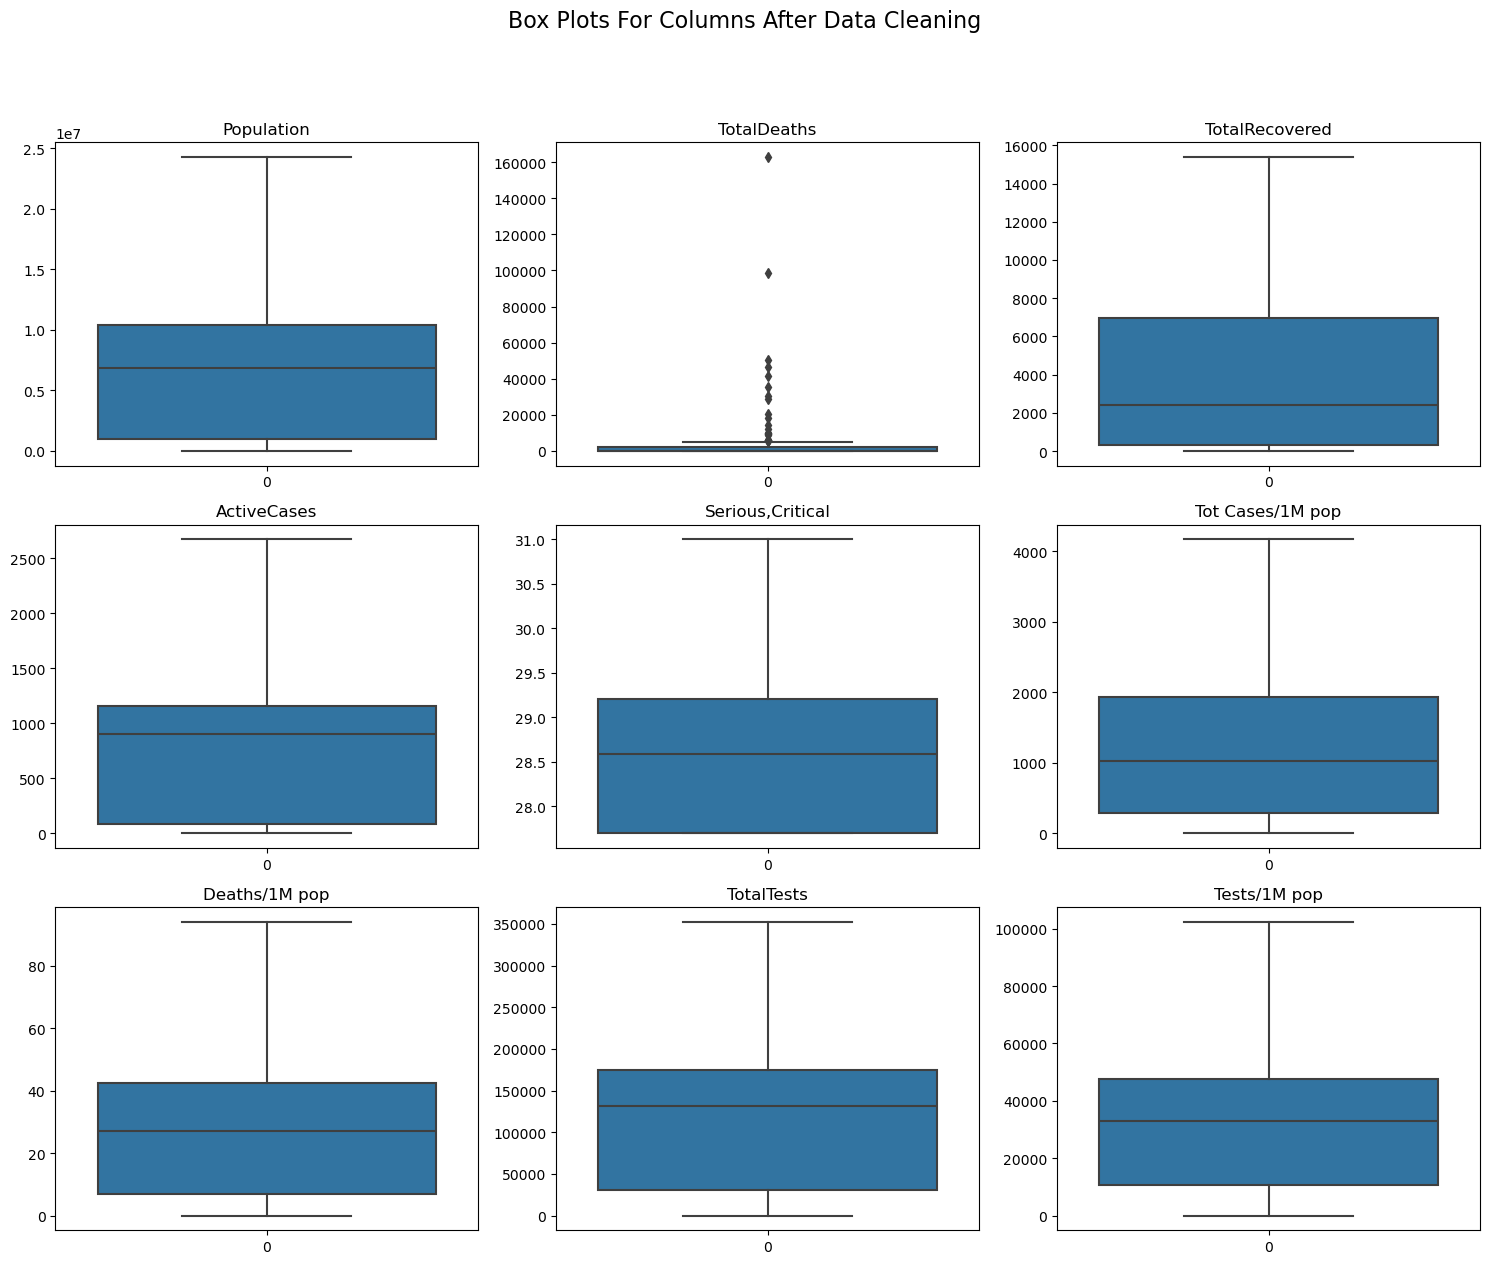

In [25]:
columns = [ 'Population', 'TotalDeaths', 'TotalRecovered', 
                   'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  
axes = axes.flatten()  

for i, col in enumerate(columns):
    sns.boxplot(data=df1[col], ax=axes[i]) 
    axes[i].set_title(col)
fig.suptitle('Box Plots For Columns After Data Cleaning', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()

In [26]:
missing_values = df1.isnull().sum()
print("Missing values per column:\n", missing_values)

print("-------------------------------------------------------")

duplicates = df1.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

Missing values per column:
 Country/Region      0
Continent           0
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
dtype: int64
-------------------------------------------------------
Number of duplicated rows: 0


6- Saving CSV File.

In [27]:
df1.to_csv('Final File2.csv', index=False)